In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import keras
from keras import datasets
import sklearn.datasets

In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data=data.drop(['RowNumber','CustomerId','Surname','Geography','Gender'],axis=1)

In [5]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [6]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
from sklearn.preprocessing import StandardScaler
num=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']
sc=StandardScaler()
data[num]=sc.fit_transform(data[num])

In [8]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0


In [9]:
X=data.drop('Exited',axis=1)
y=data['Exited']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [11]:
import keras

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
ann=Sequential()
ann.add(Dense(units=20,activation='relu',input_shape=(8,)))

ann.add(Dense(units=25,activation='relu'))

ann.add(Dense(units=2,activation='sigmoid'))

In [22]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
history=ann.fit(X_train,y_train,validation_split=0.1,epochs=30)

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7645 - loss: 0.5181 - val_accuracy: 0.8100 - val_loss: 0.4505
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8131 - loss: 0.4298 - val_accuracy: 0.8188 - val_loss: 0.4278
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8321 - loss: 0.4082 - val_accuracy: 0.8300 - val_loss: 0.4079
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8366 - loss: 0.3930 - val_accuracy: 0.8487 - val_loss: 0.3941
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8510 - loss: 0.3746 - val_accuracy: 0.8575 - val_loss: 0.3749
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8593 - loss: 0.3530 - val_accuracy: 0.8600 - val_loss: 0.3657
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8621 - loss: 0.3519 - val_accuracy: 0.8600 - val_loss: 0.3617
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3449 - val_accuracy: 0.

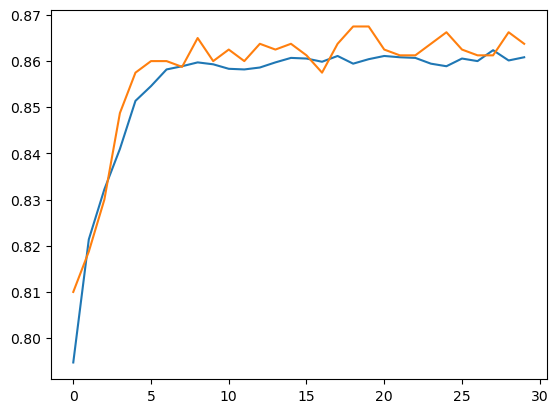

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

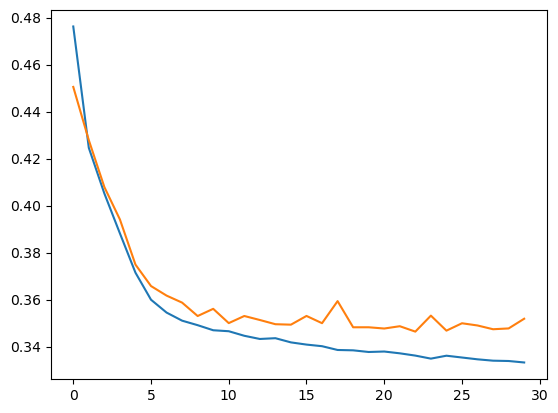

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [30]:
ann.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8528 - loss: 0.3563


[0.38047632575035095, 0.8450000286102295]

In [32]:
X_test.iloc[0]

CreditScore       -0.191713
Age               -1.518201
Tenure            -0.695982
Balance            0.737129
NumOfProducts     -0.911583
HasCrCard          0.646092
IsActiveMember    -1.030670
EstimatedSalary    0.819727
Name: 8018, dtype: float64

In [34]:
y_pred=ann.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [36]:
print(y_pred[0])
# it gives probabality of  0 or 1 

[0.79208153 0.2180671 ]


In [38]:
y_test[0:10]

8018    1
9225    0
3854    0
2029    0
3539    0
1942    0
1250    0
2817    0
4211    1
477     0
Name: Exited, dtype: int64

In [40]:
#covering predicted probabality  to labels
y_pred_label=[np.argmax(i) for i in y_pred]
print(y_pred_label[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [42]:
input_data=(619,42,2,0.00,1,1,1,101348.88)
# change input to numpy array
input_data_array=np.asarray(input_data)
# reshape
input_data_array_reshape=input_data_array.reshape(1,-1)
#standardizing
input_data_array_reshape_sdt=sc.transform(input_data_array_reshape)
#prediction
prediction=ann.predict(input_data_array_reshape_sdt)
print(prediction)
prediction_label=[np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0]==0):
    print("no churn")
else:
    print("churn")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[0.61300695 0.32463914]]
[0]
no churn
